# Business Understanding 

## Problem Definition Context

Customer churn is a critical issue for telecom companies like SyriaTel, as retaining existing customers is far more cost-effective than acquiring new ones. By analyzing customer data, SyriaTel can identify usage patterns and service behaviors that predict which customers are likely to leave, enabling proactive retention efforts.

# Stakeholder

The main stakeholders are SyriaTel’s management, marketing, and customer service teams. Predictive insights will help these departments anticipate churn, improve service quality, and target high-risk customers with personalized retention campaigns.

# Problem Statement

The goal is to develop a classification model that predicts whether a customer will churn based on factors such as service usage, plan type, and customer service interactions.
This model will:

1. Identify the most influential drivers of churn.

2. Predict high-risk customers early.

3. Support data-driven retention strategies.

# Scope and Evaluation

The analysis includes:

1. Exploratory Data Analysis (EDA).

2. Feature engineering and preprocessing.

3. Model training using classification algorithms.

4. Evaluation using accuracy, precision, recall, F1-score, and primarily ROC-AUC to measure model performance.

# Exploratory Data Analysis (EDA).

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
#load the data
df = pd.read_csv('syriatel_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
df.shape

(3333, 21)

In [5]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [6]:
# Remove leading/trailing spaces and replace internal spaces with underscores
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [7]:
print(df.columns.tolist())


['state', 'account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn']


In [50]:

# Remove hyphens and convert to integer
df['phone_number'] = df['phone_number'].astype(str).str.replace('-', '', regex=False).astype(int)

In [51]:
df['phone_number']

0       3824657
1       3717191
2       3581921
3       3759999
4       3306626
         ...   
3328    4144276
3329    3703271
3330    3288230
3331    3646381
3332    4004344
Name: phone_number, Length: 3333, dtype: int32

In [9]:
#Check the class balance of the target (churn).
df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

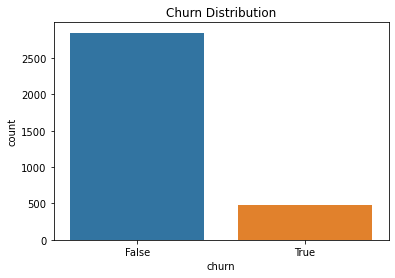

In [8]:
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Univariate Analysis-Numerical features

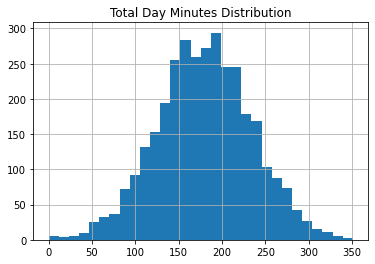

In [14]:
df['total_day_minutes'].hist(bins=30)
plt.title('Total Day Minutes Distribution')
plt.show()

<AxesSubplot:xlabel='area_code', ylabel='count'>

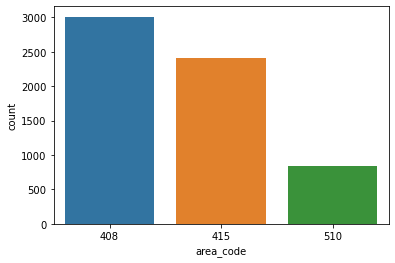

In [11]:
# Univariate Analysis-Categorical features
sns.countplot(x='area_code', data=df)

<AxesSubplot:xlabel='international_plan', ylabel='count'>

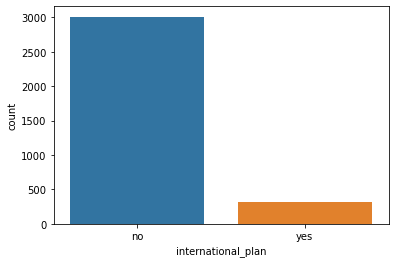

In [33]:
sns.countplot(x='international_plan', data=df)

<AxesSubplot:xlabel='voice_mail_plan', ylabel='count'>

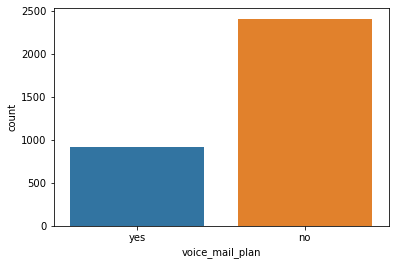

In [34]:
sns.countplot(x='voice_mail_plan', data=df)

# Bivariate Analysis (Feature vs. Churn)

<AxesSubplot:xlabel='churn', ylabel='total_day_minutes'>

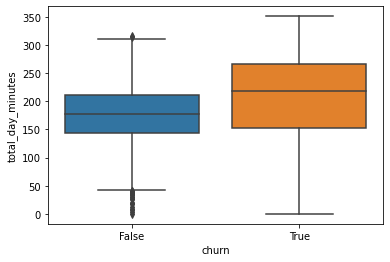

In [13]:
#Check relationships between features and churn.
sns.boxplot(x='churn', y='total_day_minutes', data=df)

In [ ]:
#Median total day minutes:Non-churn: 200 minutes/day while Churn: 150 minutes/day

# Customers who use the service less during the day are more likely to leave. They may feel they are not getting enough value from the service.

<AxesSubplot:xlabel='international_plan', ylabel='churn'>

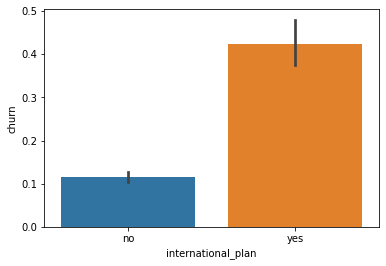

In [14]:
sns.barplot(x='international_plan', y='churn', data=df)

In [ ]:
# Customers with an international plan are 4 times more likely to churn than those without. 
# Retention strategies could target these customers specifically

<AxesSubplot:xlabel='customer_service_calls', ylabel='churn'>

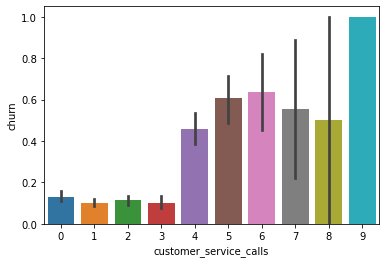

In [15]:
sns.barplot(x='customer_service_calls', y='churn', data=df)

In [ ]:
#The bar heights increase with more customer service calls, it indicates that customers who call more are more likely to churn.

#This is a key insight that can guide retention strategies — e.g., intervene with customers making multiple service calls.

# Correlation Analysis

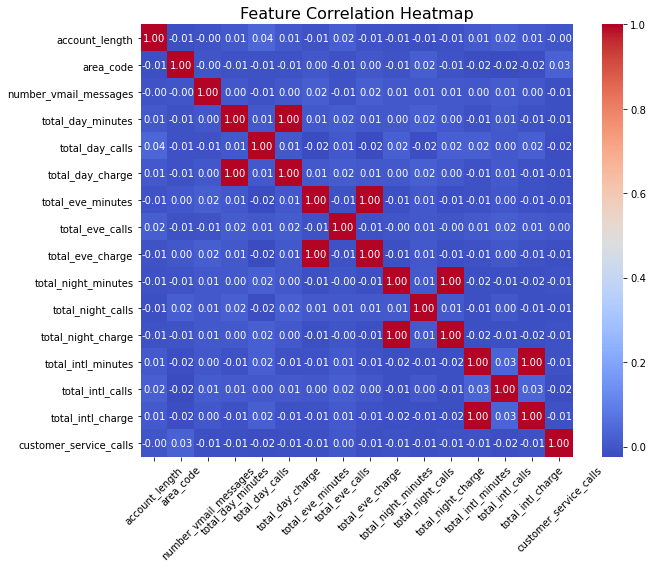

In [35]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation
corr = numeric_df.corr()

# Set figure size BEFORE plotting
plt.figure(figsize=(10,8))  # adjust width & height as needed

# Plot heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)

plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)  # rotate x labels for readability
plt.yticks(rotation=0)   # keep y labels horizontal
plt.tight_layout()       # adjust layout so nothing is cut off
plt.show()

In [39]:
# Keep phone_number separately
phone_numbers = df['phone_number']

# Encode Categorical Variables

In [10]:
#Preprocessing

#scaling,log tranformation, encodeing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder

In [52]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(
    df,
    columns=['international_plan', 'voice_mail_plan',],
    drop_first=True
)

In [55]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   int32  
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   

In [56]:
df_encoded['churn'] = df_encoded['churn'].astype(int)

df_encoded.head()

,state,account_length,area_code,phone_number,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,international_plan_yes,voice_mail_plan_yes
0,KS,128,415,3824657,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,0,0,1
1,OH,107,415,3717191,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,0,0,1
2,NJ,137,415,3581921,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,OH,84,408,3759999,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,OK,75,415,3306626,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,0,1,0


# Prepare Data for Modeling

In [58]:
# Separate features (X) and target (y)
X = df_encoded.drop(columns=['churn', 'phone_number'])
y = df_encoded['churn']